In [7]:
import pandas as pd

# Load each year's ADP data from your local machine
df_2022 = pd.read_excel("/Users/jason/Desktop/Project/2022ADP.xlsx")
df_2022["Year"] = 2022

df_2023 = pd.read_excel("/Users/jason/Desktop/Project/2023ADP.xlsx")
df_2023["Year"] = 2023

df_2024 = pd.read_excel("/Users/jason/Desktop/Project/2024ADP.xlsx")
df_2024["Year"] = 2024

# Combine them into one DataFrame
df_all_adp = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Preview the combined data
print(df_all_adp.head())


                Player Incorrect_team  POS  Underdog  Year  Unnamed: 5  \
0      Jonathan Taylor            IND  RB1       1.0  2022         NaN   
1  Christian McCaffrey             SF  RB2       2.0  2022         NaN   
2     Justin Jefferson            MIN  WR1       3.0  2022         NaN   
3          Cooper Kupp            SEA  WR2       4.0  2022         NaN   
4        Austin Ekeler            WAS  RB3       5.0  2022         NaN   

   Unnamed: 6       Name_Match Team_Match Team       CorrectedNames  
0         NaN  Patrick Mahomes         KC  IND      Jonathan Taylor  
1         NaN       Josh Allen        BUF  CAR  Christian McCaffrey  
2         NaN      Jalen Hurts        PHI  MIN     Justin Jefferson  
3         NaN       Joe Burrow        CIN  LAR          Cooper Kupp  
4         NaN       Geno Smith        SEA  LAC        Austin Ekeler  


In [8]:
# Keep only the relevant columns
df_all_adp = df_all_adp[["Player", "POS", "Underdog", "Year", "Team"]]

# Preview the result
print(df_all_adp.head())


                Player  POS  Underdog  Year Team
0      Jonathan Taylor  RB1       1.0  2022  IND
1  Christian McCaffrey  RB2       2.0  2022  CAR
2     Justin Jefferson  WR1       3.0  2022  MIN
3          Cooper Kupp  WR2       4.0  2022  LAR
4        Austin Ekeler  RB3       5.0  2022  LAC


In [9]:
import pandas as pd

# Load each Excel file
df_2022_wins = pd.read_excel("/Users/jason/Desktop/Project/2022Wins.xlsx")
df_2023_wins = pd.read_excel("/Users/jason/Desktop/Project/2023Wins.xlsx")
df_2024_wins = pd.read_excel("/Users/jason/Desktop/Project/2024Wins.xlsx")

# Combine into one DataFrame
df_all_wins = pd.concat([df_2022_wins, df_2023_wins, df_2024_wins], ignore_index=True)

# Optional: standardize team abbreviations (e.g., fix 'JAX' to 'JAC')
df_all_wins["Team"] = df_all_wins["Team"].replace("JAX", "JAC")

# Preview the result
print(df_all_wins.head())


  Team  WinTotal(O/U)  Wins(Actual)  Year
0  ARI            8.5             4  2022
1  ATL            4.5             7  2022
2  BAL           10.5            10  2022
3  BUF           11.5            13  2022
4  CAR            6.5             7  2022


In [10]:
# Standardize 'Team' column in ADP data: change 'JAX' to 'JAC'
df_all_adp["Team"] = df_all_adp["Team"].replace("JAX", "JAC")

# Optional: verify the fix
print(df_all_adp["Team"].unique())


['IND' 'CAR' 'MIN' 'LAR' 'LAC' 'CIN' 'TEN' 'BUF' 'LV' 'PIT' 'KC' 'NYG'
 'NO' 'DAL' 'DET' 'GB' 'DEN' 'SF' 'BAL' 'MIA' 'TB' 'PHI' 'ATL' 'CLE' 'ARI'
 'JAC' 'WAS' 'HOU' 'NYJ' 'SEA' 'CHI' 'NE' nan 'IV' 'III' 'HU' 'II' 'Ali']


In [11]:
valid_teams = [
    'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
    'DET', 'GB', 'HOU', 'IND', 'JAC', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
    'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB',
    'TEN', 'WAS'
]


In [12]:
df_all_adp = df_all_adp[df_all_adp["Team"].isin(valid_teams)]


In [13]:
print(df_all_adp["Team"].unique())


['IND' 'CAR' 'MIN' 'LAR' 'LAC' 'CIN' 'TEN' 'BUF' 'LV' 'PIT' 'KC' 'NYG'
 'NO' 'DAL' 'DET' 'GB' 'DEN' 'SF' 'BAL' 'MIA' 'TB' 'PHI' 'ATL' 'CLE' 'ARI'
 'JAC' 'WAS' 'HOU' 'NYJ' 'SEA' 'CHI' 'NE']


In [14]:
# Merge ADP data with win totals
df_merged = pd.merge(df_all_adp, df_all_wins, on=["Team", "Year"], how="left")

# Preview the merged result
print(df_merged.head())


                Player  POS  Underdog  Year Team  WinTotal(O/U)  Wins(Actual)
0      Jonathan Taylor  RB1       1.0  2022  IND            9.5             4
1  Christian McCaffrey  RB2       2.0  2022  CAR            6.5             7
2     Justin Jefferson  WR1       3.0  2022  MIN            9.5            13
3          Cooper Kupp  WR2       4.0  2022  LAR           10.5             5
4        Austin Ekeler  RB3       5.0  2022  LAC           10.5            10


In [15]:
# Load each end-of-season stats file
df_2022_eos = pd.read_excel("/Users/jason/Desktop/Project/2022EOS.xlsx")
df_2023_eos = pd.read_excel("/Users/jason/Desktop/Project/2023EOS.xlsx")
df_2024_eos = pd.read_excel("/Users/jason/Desktop/Project/2024EOS.xlsx")

# Add positional rank for each
for df in [df_2022_eos, df_2023_eos, df_2024_eos]:
    df["PositionalRank"] = (
        df.groupby("POS")["PTS"]
        .rank(method="min", ascending=False)
        .astype(int)
    )

# Combine into one DataFrame
df_all_eos = pd.concat([df_2022_eos, df_2023_eos, df_2024_eos], ignore_index=True)

# Preview the result
print(df_all_eos.head())


   Rank             Name Team POS    PTS  PTS/G  GP  Year  PositionalRank
0     1  Patrick Mahomes   KC  QB  480.8   30.1  16  2022               1
1     2       Josh Allen  BUF  QB  437.8   29.2  15  2022               2
2     3      Jalen Hurts  PHI  QB  413.6   29.5  14  2022               3
3     4       Joe Burrow  CIN  QB  407.1   27.1  15  2022               4
4     5       Geno Smith  SEA  QB  348.3   21.8  16  2022               5


In [16]:
# Merge on Player name, Year, and optionally POS if needed for safety
df_final = pd.merge(df_merged, df_all_eos, how="left", left_on=["Player", "Year"], right_on=["Name", "Year"])

# Optional: drop the duplicate name column from EOS if Player and Name are the same
df_final = df_final.drop(columns=["Name"])

# Preview the result
print(df_final.head())


                Player POS_x  Underdog  Year Team_x  WinTotal(O/U)  \
0      Jonathan Taylor   RB1       1.0  2022    IND            9.5   
1  Christian McCaffrey   RB2       2.0  2022    CAR            6.5   
2     Justin Jefferson   WR1       3.0  2022    MIN            9.5   
3          Cooper Kupp   WR2       4.0  2022    LAR           10.5   
4        Austin Ekeler   RB3       5.0  2022    LAC           10.5   

   Wins(Actual)   Rank Team_y POS_y    PTS  PTS/G    GP  PositionalRank  
0             4  101.0    IND    RB  132.4   12.0  11.0            31.0  
1             7   16.0    CAR    RB  293.1   18.3  16.0             3.0  
2            13   14.0    MIN    WR  297.5   18.6  16.0             1.0  
3             5   70.0    LAR    WR  163.9   18.2   9.0            21.0  
4            10   12.0    LAC    RB  312.2   19.5  16.0             1.0  


In [17]:
# Rename columns for clarity and drop duplicate/unnecessary ones
df_final = df_final.rename(columns={
    "Player": "Player",
    "POS_x": "ADP_POS",
    "Underdog": "ADP",
    "Team_x": "Team",
    "WinTotal(O/U)": "VegasWinTotal",
    "Wins(Actual)": "ActualWins",
    "Rank": "FinalRankOverall",
    "POS_y": "EOS_POS",
    "PTS": "FantasyPoints",
    "PTS/G": "PointsPerGame",
    "GP": "GamesPlayed",
    "PositionalRank": "FinalRankPosition"
}).drop(columns=["Team_y"])


In [18]:
print(df_final.head())

                Player ADP_POS  ADP  Year Team  VegasWinTotal  ActualWins  \
0      Jonathan Taylor     RB1  1.0  2022  IND            9.5           4   
1  Christian McCaffrey     RB2  2.0  2022  CAR            6.5           7   
2     Justin Jefferson     WR1  3.0  2022  MIN            9.5          13   
3          Cooper Kupp     WR2  4.0  2022  LAR           10.5           5   
4        Austin Ekeler     RB3  5.0  2022  LAC           10.5          10   

   FinalRankOverall EOS_POS  FantasyPoints  PointsPerGame  GamesPlayed  \
0             101.0      RB          132.4           12.0         11.0   
1              16.0      RB          293.1           18.3         16.0   
2              14.0      WR          297.5           18.6         16.0   
3              70.0      WR          163.9           18.2          9.0   
4              12.0      RB          312.2           19.5         16.0   

   FinalRankPosition  
0               31.0  
1                3.0  
2                1.0  


In [19]:
unmatched = df_final[df_final["FinalRankOverall"].isna()]
print(unmatched[["Player", "Team", "Year", "ADP_POS"]].head(20))
print(f"Total unmatched rows: {len(unmatched)}")


                     Player Team  Year ADP_POS
17          Aaron Jones Sr.   GB  2022    RB11
19         Deebo Samuel Sr.   SF  2022     WR7
38       Allen Robinson II   LAR  2022    WR19
46       Patrick Mahomes II   KC  2022     QB4
53              A.J. Dillon  PHI  2022    RB19
59          Michael Thomas    NO  2022    WR30
90           Rashaad Penny   SEA  2022    RB31
112           Melvin Gordon  DEN  2022    RB38
131        Russell Gage Jr.   TB  2022    WR60
137      Mecole Hardman Jr.   KC  2022    WR61
140            DJ Chark Jr.  DET  2022    WR64
141  Albert Okwuegbunam Jr.  DEN  2022    TE14
154          Jarvis Landry    NO  2022    WR70
161           Robbie Chosen  CAR  2022    WR72
163          J.D. McKissic   WAS  2022    RB53
165      Brian Robinson Jr.  WAS  2022    RB54
189         Mark Ingram II    NO  2022    RB60
191         Ryan Tannehill   TEN  2022    QB26
224       Mitchell Trubisky  BUF  2022    QB32
227      Dontrell Hilliard   TEN  2022    RB71
Total unmatch

In [20]:
def clean_name(name):
    if not isinstance(name, str):
        return ""
    return (
        name.replace(" Jr.", "")
            .replace(" Sr.", "")
            .replace(" II", "")
            .replace(" III", "")
            .replace(".", "")
            .replace("'", "")
            .strip()
            .lower()
    )


In [21]:
df_merged["PlayerClean"] = df_merged["Player"].apply(clean_name)
df_all_eos["NameClean"] = df_all_eos["Name"].apply(clean_name)


In [22]:
df_final_cleaned = pd.merge(
    df_merged,
    df_all_eos,
    how="left",
    left_on=["PlayerClean", "Year"],
    right_on=["NameClean", "Year"]
)


In [23]:
print(df_final_cleaned.columns.tolist())


['Player', 'POS_x', 'Underdog', 'Year', 'Team_x', 'WinTotal(O/U)', 'Wins(Actual)', 'PlayerClean', 'Rank', 'Name', 'Team_y', 'POS_y', 'PTS', 'PTS/G', 'GP', 'PositionalRank', 'NameClean']


In [24]:
df_final_cleaned = df_final_cleaned.rename(columns={
    "POS_x": "ADP_POS",
    "Underdog": "ADP",
    "Team_x": "Team",
    "WinTotal(O/U)": "VegasWinTotal",
    "Wins(Actual)": "ActualWins",
    "Rank": "FinalRankOverall",
    "POS_y": "EOS_POS",
    "PTS": "FantasyPoints",
    "PTS/G": "PointsPerGame",
    "GP": "GamesPlayed",
    "PositionalRank": "FinalRankPosition"
}).drop(columns=["Team_y", "Name", "PlayerClean", "NameClean"], errors="ignore")


In [25]:
unmatched_cleaned = df_final_cleaned[df_final_cleaned["FinalRankOverall"].isna()]
print(unmatched_cleaned[["Player", "Team", "Year", "ADP_POS"]].head(30))
print(f"Total unmatched rows after cleaning: {len(unmatched_cleaned)}")


                 Player Team  Year ADP_POS
112       Melvin Gordon  DEN  2022    RB38
161       Robbie Chosen  CAR  2022    WR72
224   Mitchell Trubisky  BUF  2022    QB32
316          Sam Howell  WAS  2022    QB40
330       Mason Rudolph  PIT  2022    QB42
337        Chig Okonkwo  TEN  2022    TE51
339      Chris Oladokun   KC  2022    QB44
346           Drew Lock  SEA  2022    QB46
353   Calvin Austin III  PIT  2022   WR156
359           Bo Melton   GB  2022   WR160
367         Tyler Badie  DEN  2022   RB109
372    Michael Strachan  WAS  2022   WR164
387         Justyn Ross   KC  2022   WR173
404   Sincere McCormick   LV  2022   RB119
415      Blaine Gabbert   TB  2022    QB56
424      Logan Woodside  ATL  2022    QB58
426         David Sills  ATL  2022   WR189
590        Chig Okonkwo  TEN  2023    TE17
721          Trey Lance  LAC  2023    QB36
722        Jelani Woods  IND  2023    TE46
741          Zack Kuntz  NYJ  2023    TE49
764     Stetson Bennett  LAR  2023    QB42
824      Ju

In [26]:
df_final_cleaned = df_final_cleaned[~df_final_cleaned["FinalRankOverall"].isna()]


In [27]:
print(df_final_cleaned.head())

                Player ADP_POS  ADP  Year Team  VegasWinTotal  ActualWins  \
0      Jonathan Taylor     RB1  1.0  2022  IND            9.5           4   
1  Christian McCaffrey     RB2  2.0  2022  CAR            6.5           7   
2     Justin Jefferson     WR1  3.0  2022  MIN            9.5          13   
3          Cooper Kupp     WR2  4.0  2022  LAR           10.5           5   
4        Austin Ekeler     RB3  5.0  2022  LAC           10.5          10   

   FinalRankOverall EOS_POS  FantasyPoints  PointsPerGame  GamesPlayed  \
0             101.0      RB          132.4           12.0         11.0   
1              16.0      RB          293.1           18.3         16.0   
2              14.0      WR          297.5           18.6         16.0   
3              70.0      WR          163.9           18.2          9.0   
4              12.0      RB          312.2           19.5         16.0   

   FinalRankPosition  
0               31.0  
1                3.0  
2                1.0  


In [28]:
df_final_cleaned["ADP_Delta"] = df_final_cleaned["ADP"] - df_final_cleaned["FinalRankOverall"]


In [29]:
df_final_cleaned["Overperformed"] = df_final_cleaned["ADP_Delta"] > 0
print(df_final_cleaned["Overperformed"].value_counts())


Overperformed
False    708
True     531
Name: count, dtype: int64


In [30]:
team_overperf = df_final_cleaned.groupby("Team")["ADP_Delta"].mean().sort_values(ascending=False)
print(team_overperf.head(10))  # Top 10 overperforming teams


Team
CAR     5.909091
SEA     2.500000
IND    -2.166667
DET    -2.450000
WAS    -4.542857
HOU    -7.048780
PIT    -9.323529
ATL   -11.777778
MIA   -13.578947
LV    -13.692308
Name: ADP_Delta, dtype: float64


In [31]:
# Create buckets for Vegas win totals
df_final_cleaned["VegasTier"] = pd.cut(
    df_final_cleaned["VegasWinTotal"],
    bins=[0, 6.5, 9.5, 13],
    labels=["0-6.5 Wins", "7-9.5 Wins", "10+ Wins"]
)

# Calculate overperformance rate by tier
vegas_perf_rate = df_final_cleaned.groupby("VegasTier")["Overperformed"].mean()
print(vegas_perf_rate)


VegasTier
0-6.5 Wins    0.517241
7-9.5 Wins    0.430213
10+ Wins      0.350000
Name: Overperformed, dtype: float64


/var/folders/m0/36pclbx13c75kmt6bckgb7z40000gn/T/ipykernel_40923/1977435012.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vegas_perf_rate = df_final_cleaned.groupby("VegasTier")["Overperformed"].mean()


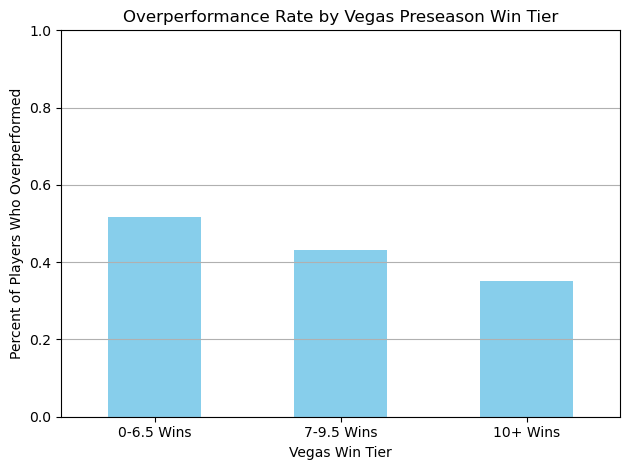

In [32]:
import matplotlib.pyplot as plt

vegas_perf_rate = df_final_cleaned.groupby("VegasTier", observed=True)["Overperformed"].mean()

vegas_perf_rate.plot(kind='bar', color='skyblue')
plt.title("Overperformance Rate by Vegas Preseason Win Tier")
plt.ylabel("Percent of Players Who Overperformed")
plt.xlabel("Vegas Win Tier")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


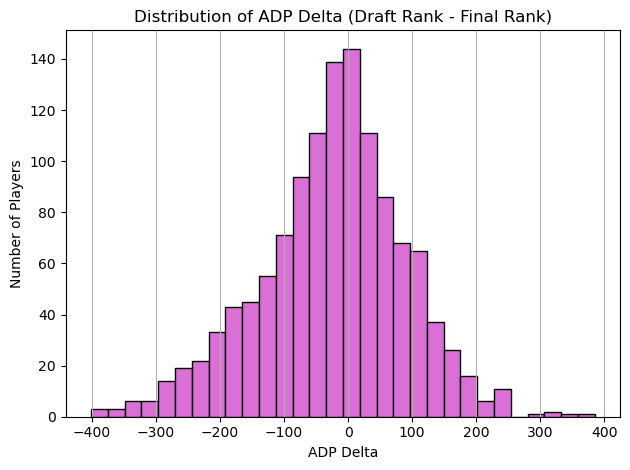

In [33]:
df_final_cleaned["ADP_Delta"].hist(bins=30, color='orchid', edgecolor='black')
plt.title("Distribution of ADP Delta (Draft Rank - Final Rank)")
plt.xlabel("ADP Delta")
plt.ylabel("Number of Players")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


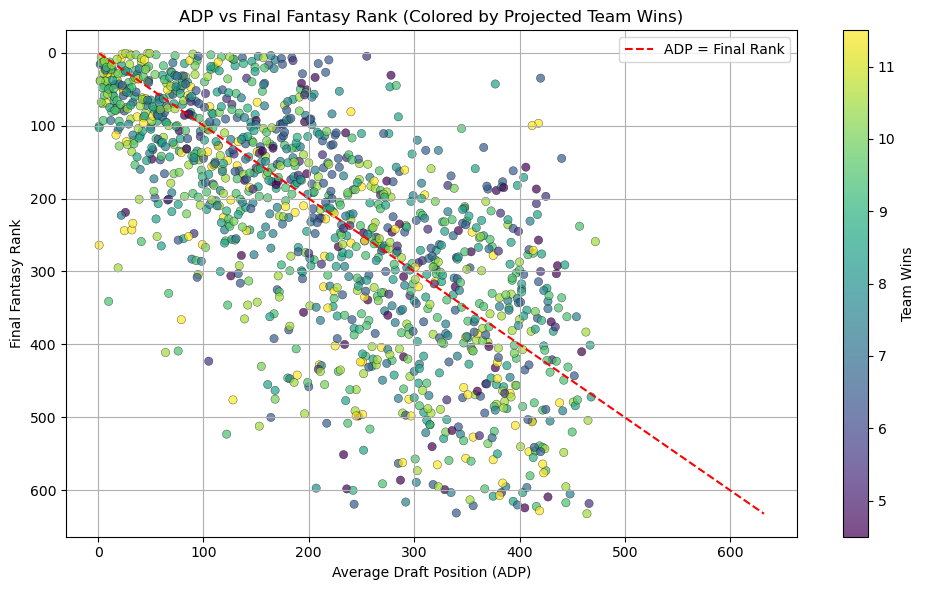

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = plt.scatter(
    df_final_cleaned["ADP"],
    df_final_cleaned["FinalRankOverall"],
    c=df_final_cleaned["VegasWinTotal"],  # color by wins
    cmap="viridis",
    alpha=0.7,
    edgecolors="black",
    linewidths=0.3
)

# Add y = x reference line
min_val = min(df_final_cleaned["ADP"].min(), df_final_cleaned["FinalRankOverall"].min())
max_val = max(df_final_cleaned["ADP"].max(), df_final_cleaned["FinalRankOverall"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="ADP = Final Rank")

# Add a colorbar and legend
plt.colorbar(scatter, label="Team Wins")
plt.legend()

# Plot titles and labels
plt.title("ADP vs Final Fantasy Rank (Colored by Projected Team Wins)")
plt.xlabel("Average Draft Position (ADP)")
plt.ylabel("Final Fantasy Rank")
plt.gca().invert_yaxis()  # better players toward top

plt.grid(True)
plt.tight_layout()
plt.show()


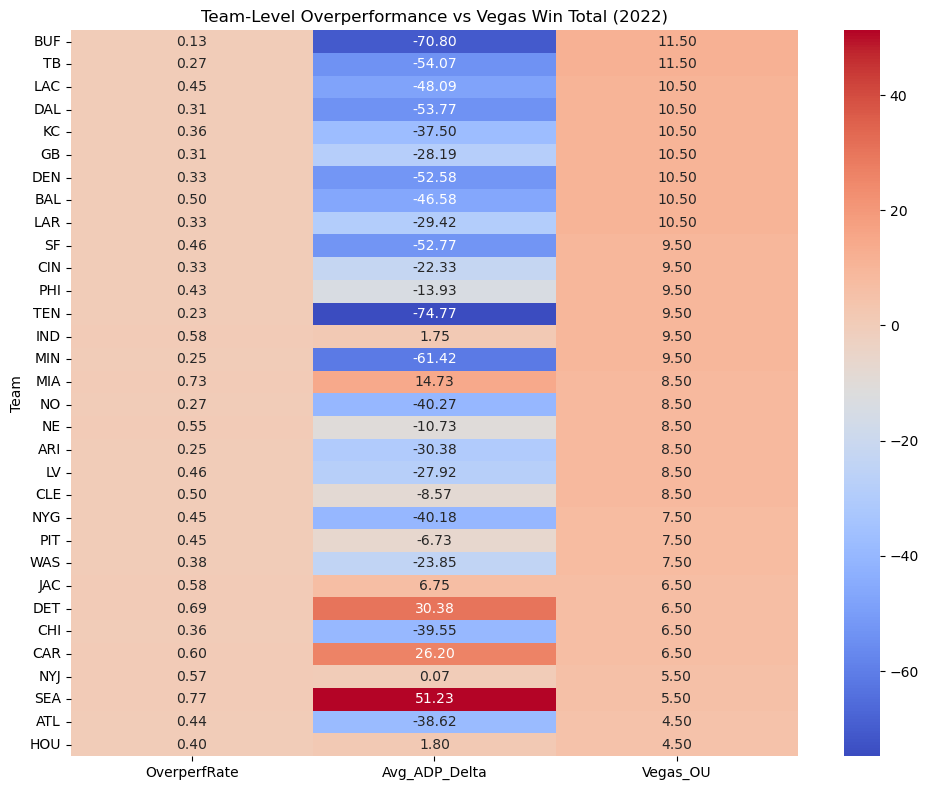

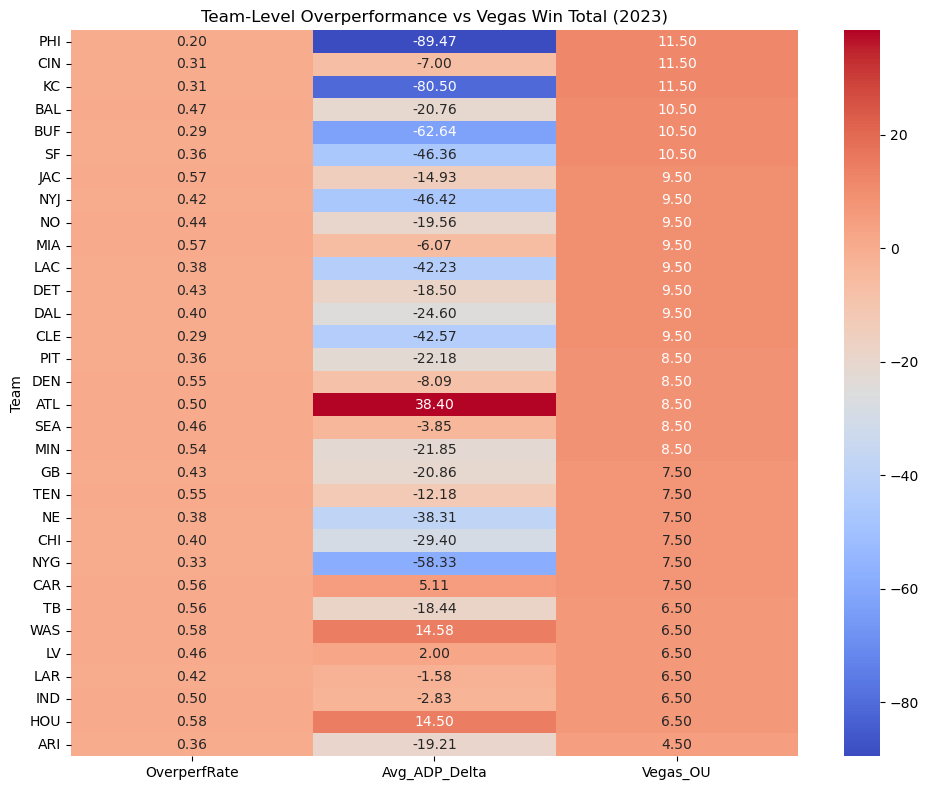

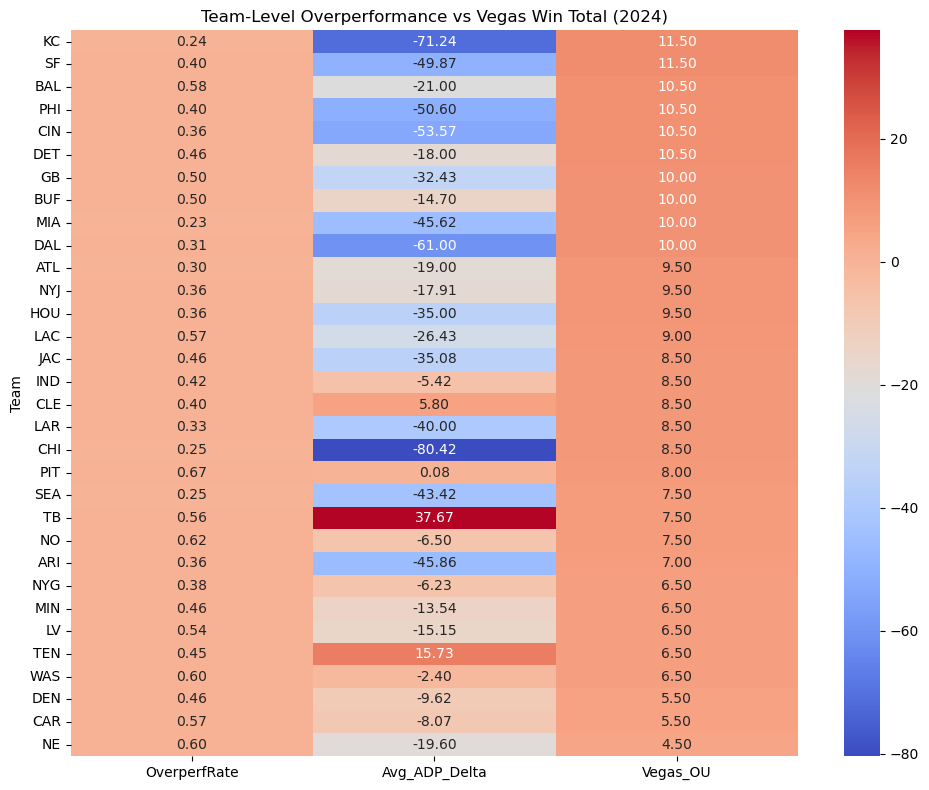

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each year
for year in [2022, 2023, 2024]:
    # Filter to that year
    df_year = df_final_cleaned[df_final_cleaned["Year"] == year]

    # Group by team and calculate metrics
    team_summary_vegas = df_year.groupby("Team").agg({
        "Overperformed": "mean",
        "ADP_Delta": "mean",
        "VegasWinTotal": "first"
    }).rename(columns={
        "Overperformed": "OverperfRate",
        "ADP_Delta": "Avg_ADP_Delta",
        "VegasWinTotal": "Vegas_OU"
    }).round(2).sort_values("Vegas_OU", ascending=False)

    # Plot heatmap for this year
    plt.figure(figsize=(10, 8))
    sns.heatmap(team_summary_vegas, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Team-Level Overperformance vs Vegas Win Total ({year})")
    plt.ylabel("Team")
    plt.tight_layout()
    plt.show()


In [36]:
# Step 1: Filter to players who played 10+ games
df_filtered = df_final_cleaned[df_final_cleaned["GamesPlayed"] >= 10]

# Step 2: Create Vegas win tiers
df_filtered["VegasTier"] = pd.cut(
    df_filtered["VegasWinTotal"],
    bins=[0, 6.5, 9.5, 13],
    labels=["0-6.5 Wins", "7-9.5 Wins", "10+ Wins"]
)

# Step 3: Group and calculate overperformance rate by tier
vegas_perf_rate = df_filtered.groupby("VegasTier", observed=True)["Overperformed"].mean()
print(vegas_perf_rate)


VegasTier
0-6.5 Wins    0.603524
7-9.5 Wins    0.488172
10+ Wins      0.451220
Name: Overperformed, dtype: float64


/var/folders/m0/36pclbx13c75kmt6bckgb7z40000gn/T/ipykernel_40923/3343219399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["VegasTier"] = pd.cut(


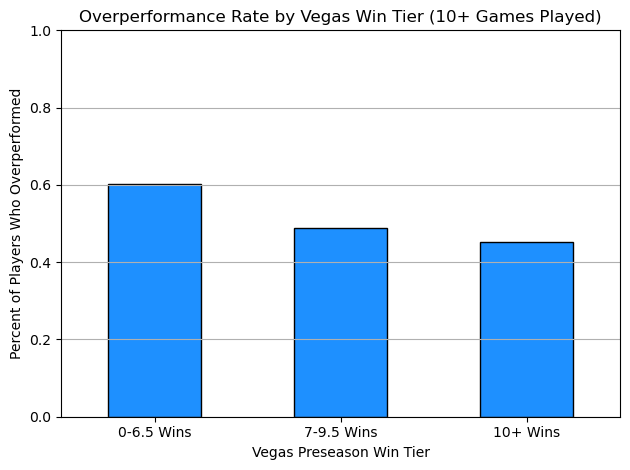

In [37]:
import matplotlib.pyplot as plt

# Bar chart of overperformance rate by Vegas win tier
vegas_perf_rate.plot(kind='bar', color='dodgerblue', edgecolor='black')

plt.title("Overperformance Rate by Vegas Win Tier (10+ Games Played)")
plt.xlabel("Vegas Preseason Win Tier")
plt.ylabel("Percent of Players Who Overperformed")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


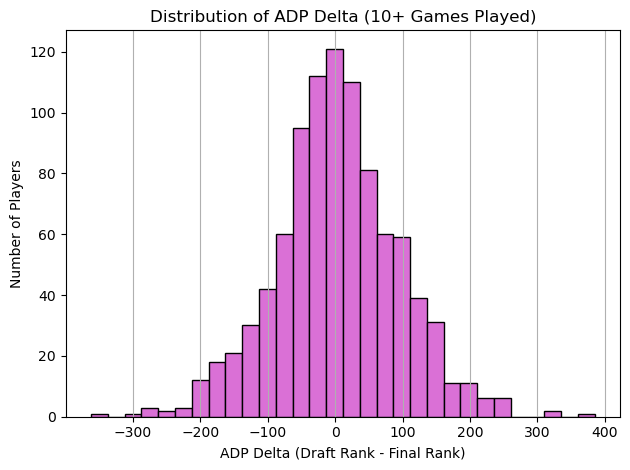

In [38]:
df_filtered = df_final_cleaned[df_final_cleaned["GamesPlayed"] >= 10]

df_filtered["ADP_Delta"].hist(bins=30, color='orchid', edgecolor='black')
plt.title("Distribution of ADP Delta (10+ Games Played)")
plt.xlabel("ADP Delta (Draft Rank - Final Rank)")
plt.ylabel("Number of Players")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


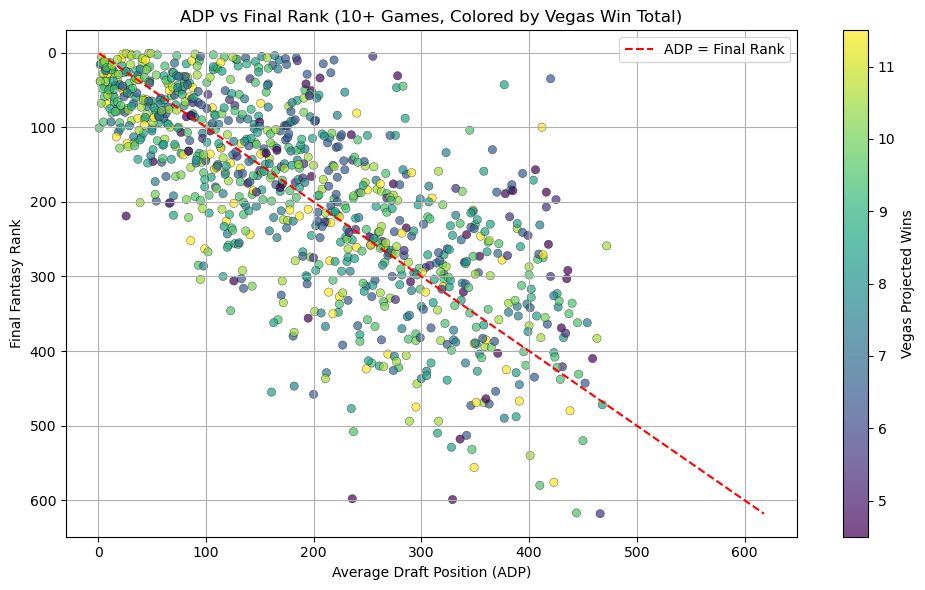

In [153]:
import matplotlib.pyplot as plt

# Filter players with 10+ games
df_filtered = df_final_cleaned[df_final_cleaned["GamesPlayed"] >= 10]

# Scatter plot using filtered data
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    df_filtered["ADP"],
    df_filtered["FinalRankOverall"],
    c=df_filtered["VegasWinTotal"],     # color by projected wins
    cmap="viridis",
    alpha=0.7,
    edgecolors="black",
    linewidths=0.3
)

# Add y = x reference line
min_val = min(df_filtered["ADP"].min(), df_filtered["FinalRankOverall"].min())
max_val = max(df_filtered["ADP"].max(), df_filtered["FinalRankOverall"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="ADP = Final Rank")
plt.legend()

plt.colorbar(scatter, label="Vegas Projected Wins")
plt.title("ADP vs Final Rank (10+ Games, Colored by Vegas Win Total)")
plt.xlabel("Average Draft Position (ADP)")
plt.ylabel("Final Fantasy Rank")
plt.gca().invert_yaxis()  # better players toward top

plt.grid(True)
plt.tight_layout()
plt.show()


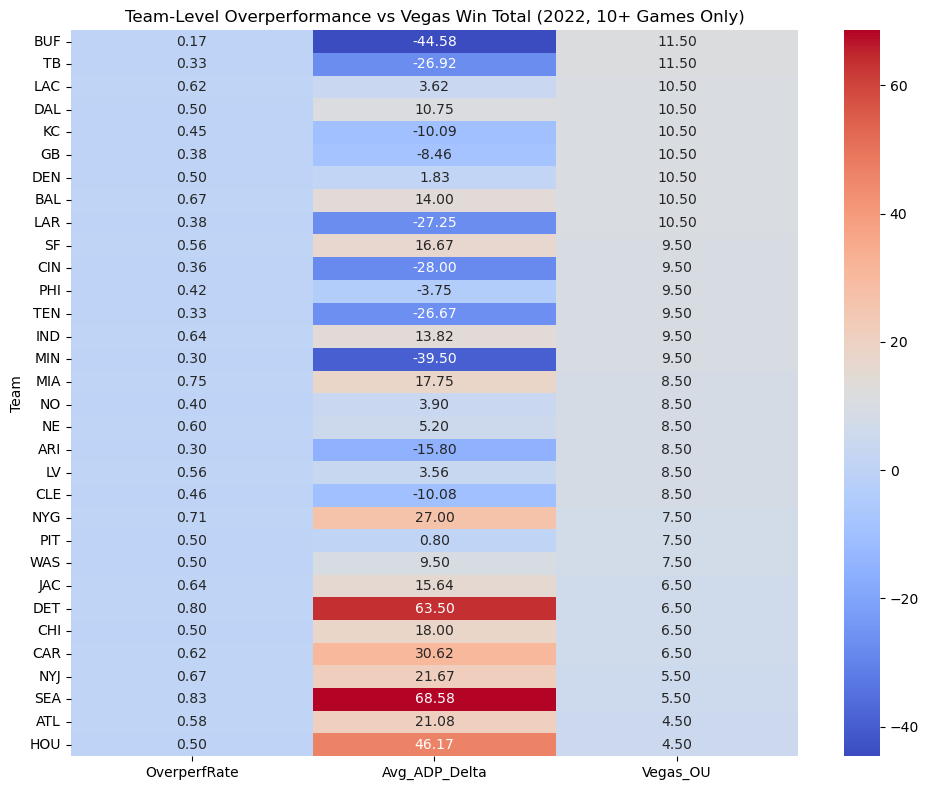

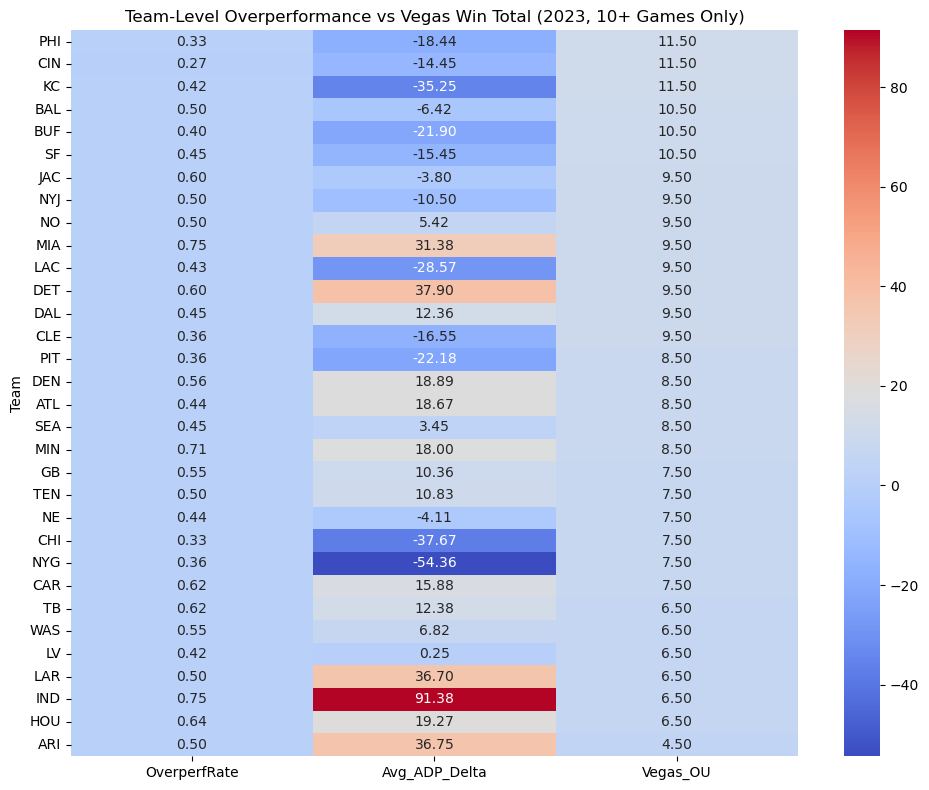

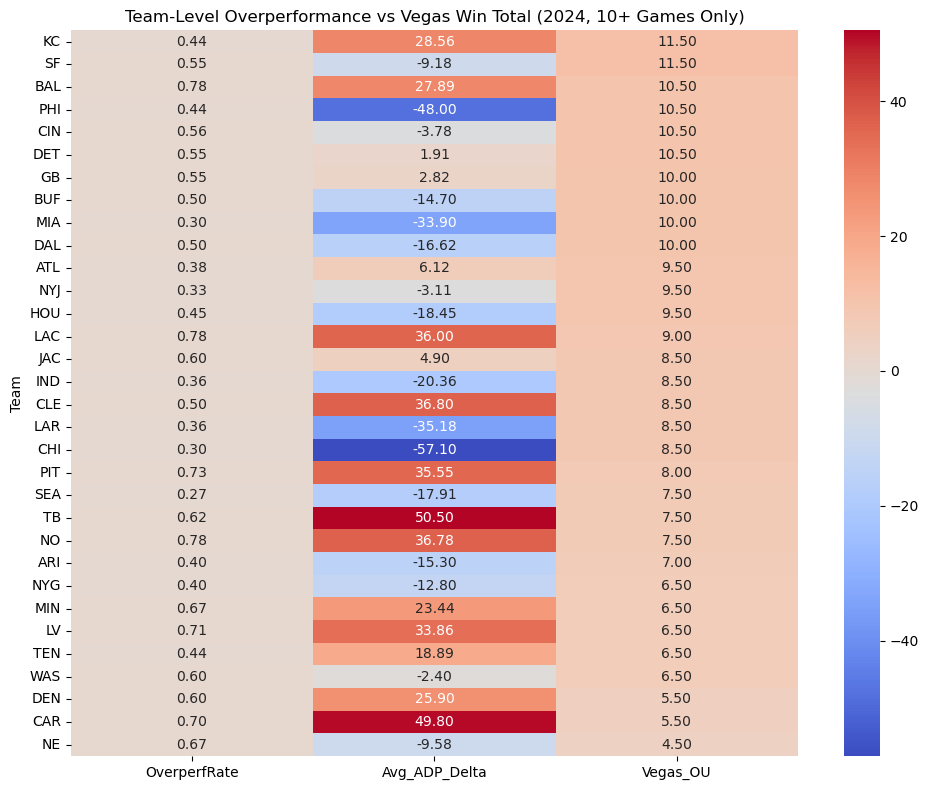

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each year
for year in [2022, 2023, 2024]:
    # Filter to that year and to players with 10+ games
    df_year = df_final_cleaned[(df_final_cleaned["Year"] == year) & (df_final_cleaned["GamesPlayed"] >= 10)]

    # Group by team and calculate metrics
    team_summary_vegas = df_year.groupby("Team").agg({
        "Overperformed": "mean",
        "ADP_Delta": "mean",
        "VegasWinTotal": "first"
    }).rename(columns={
        "Overperformed": "OverperfRate",
        "ADP_Delta": "Avg_ADP_Delta",
        "VegasWinTotal": "Vegas_OU"
    }).round(2).sort_values("Vegas_OU", ascending=False)

    # Plot heatmap for this year
    plt.figure(figsize=(10, 8))
    sns.heatmap(team_summary_vegas, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Team-Level Overperformance vs Vegas Win Total ({year}, 10+ Games Only)")
    plt.ylabel("Team")
    plt.tight_layout()
    plt.show()


In [167]:
# Create draft round column
df_final_cleaned["DraftRound"] = ((df_final_cleaned["ADP"] - 1) // 12 + 1).astype(int)

# Filter by position and end-of-season rank groups
rb1s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "RB") & 
                        (df_final_cleaned["GamesPlayed"] >= 10) & 
                        (df_final_cleaned["FinalRankPosition"].between(1, 12))]

rb2s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "RB") & 
                        (df_final_cleaned["GamesPlayed"] >= 10) & 
                        (df_final_cleaned["FinalRankPosition"].between(13, 24))]

rb3s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "RB") & 
                        (df_final_cleaned["GamesPlayed"] >= 10) & 
                        (df_final_cleaned["FinalRankPosition"].between(25, 36))]

qb1s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "QB") & 
                        (df_final_cleaned["GamesPlayed"] >= 10) & 
                        (df_final_cleaned["FinalRankPosition"].between(1, 12))]


In [41]:
# Step 1: Filter to QBs only
qbs_only = df_final_cleaned[df_final_cleaned["EOS_POS"] == "QB"]

# Step 2: Filter to players who played 10+ games (if you still want that)
qbs_only = qbs_only[qbs_only["GamesPlayed"] >= 10]

# Step 3: Keep only QB1s — top 12 per year by FinalRankPosition
qb1s = qbs_only[qbs_only["FinalRankPosition"] <= 12]


In [42]:
print("Average Vegas Win Total for QB1s:", qb1s["VegasWinTotal"].mean())


Average Vegas Win Total for QB1s: 9.027777777777779


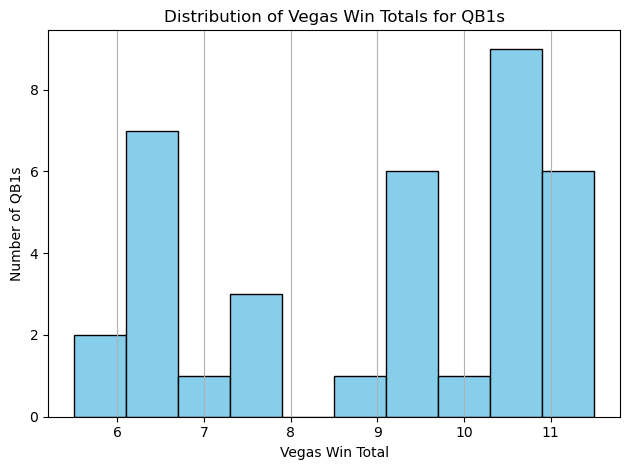

In [43]:
import matplotlib.pyplot as plt

qb1s["VegasWinTotal"].hist(bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Vegas Win Totals for QB1s")
plt.xlabel("Vegas Win Total")
plt.ylabel("Number of QB1s")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



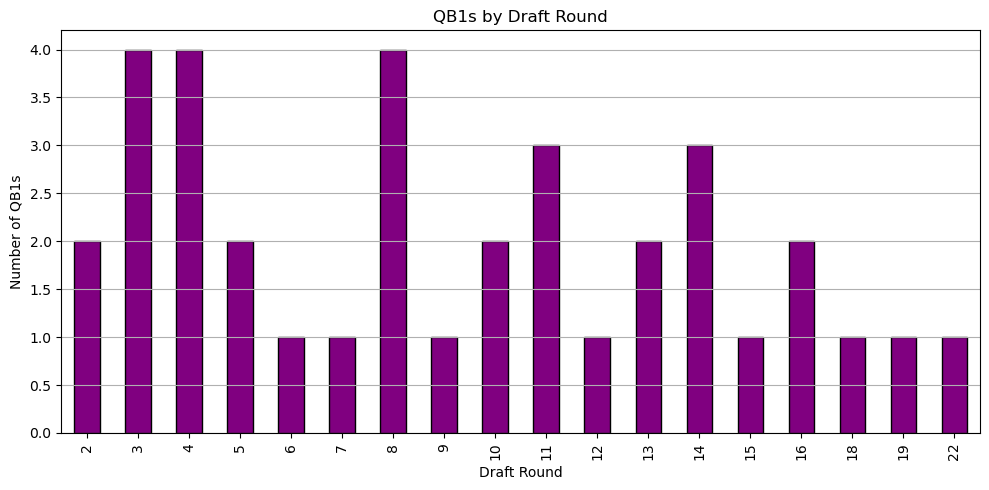

In [169]:
qb1_counts = qb1s["DraftRound"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
qb1_counts.plot(kind="bar", color="purple", edgecolor="black")
plt.title("QB1s by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Number of QB1s")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [44]:
# Step 1: Filter to RBs who played at least 10 games
rbs = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "RB") &
    (df_final_cleaned["GamesPlayed"] >= 10)
]

# Step 2: Define exclusive RB tiers
rb1s = rbs[rbs["FinalRankPosition"].between(1, 12)]
rb2s = rbs[rbs["FinalRankPosition"].between(13, 24)]
rb3s = rbs[rbs["FinalRankPosition"].between(25, 36)]


In [163]:
print("Average Vegas Win Total (RB1s):", rb1s["VegasWinTotal"].mean())
print("Average Vegas Win Total (RB2s):", rb2s["VegasWinTotal"].mean())
print("Average Vegas Win Total (RB3s):", rb3s["VegasWinTotal"].mean())

Average Vegas Win Total (RB1s): 9.027777777777779
Average Vegas Win Total (RB2s): 8.708333333333334
Average Vegas Win Total (RB3s): 7.5


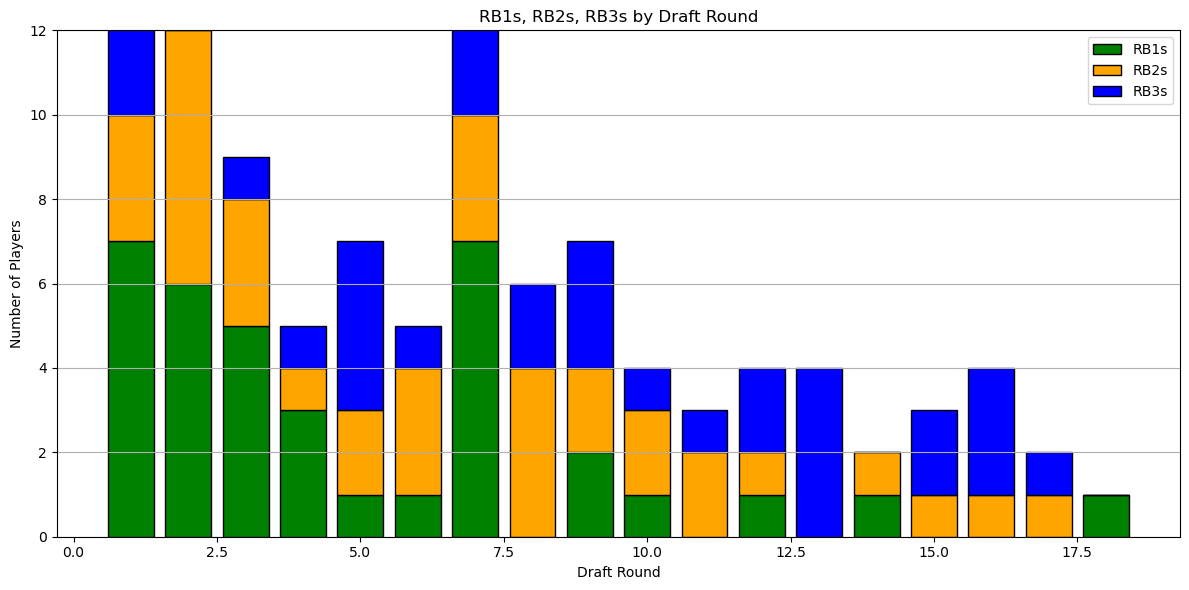

In [161]:
import matplotlib.pyplot as plt

# Count RBs by round
rb1_counts = rb1s["DraftRound"].value_counts().sort_index()
rb2_counts = rb2s["DraftRound"].value_counts().sort_index()
rb3_counts = rb3s["DraftRound"].value_counts().sort_index()

# Align all rounds
all_rounds = sorted(set(rb1_counts.index).union(rb2_counts.index).union(rb3_counts.index))
rb1_counts = rb1_counts.reindex(all_rounds, fill_value=0)
rb2_counts = rb2_counts.reindex(all_rounds, fill_value=0)
rb3_counts = rb3_counts.reindex(all_rounds, fill_value=0)

# Stacked bar plot
plt.figure(figsize=(12, 6))
plt.bar(all_rounds, rb1_counts, label="RB1s", color="green", edgecolor="black")
plt.bar(all_rounds, rb2_counts, bottom=rb1_counts, label="RB2s", color="orange", edgecolor="black")
plt.bar(all_rounds, rb3_counts, bottom=rb1_counts + rb2_counts, label="RB3s", color="blue", edgecolor="black")

plt.title("RB1s, RB2s, RB3s by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Number of Players")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [47]:
# Step 1: Filter to RBs only
wrs_only = df_final_cleaned[df_final_cleaned["EOS_POS"] == "WR"]

# Step 2: Filter to players who played at least 10 games
wrs_only = wrs_only[wrs_only["GamesPlayed"] >= 10]

# Step 3: Get RB1s (top 12) and RB1-2s (top 24)
wr1s = wrs_only[wrs_only["FinalRankPosition"] <= 12]
wr2s = wrs_only[wrs_only["FinalRankPosition"].between(13, 24)]
wr3s = wrs_only[wrs_only["FinalRankPosition"].between(25, 36)]
wr4s = wrs_only[wrs_only["FinalRankPosition"].between(37, 48)]

In [48]:
print("Average Vegas Win Total (WR1s):", wr1s["VegasWinTotal"].mean())
print("Average Vegas Win Total (WR2s):", wr2s["VegasWinTotal"].mean())
print("Average Vegas Win Total (WR3s):", wr3s["VegasWinTotal"].mean())
print("Average Vegas Win Total (WR4s):", wr4s["VegasWinTotal"].mean())

Average Vegas Win Total (WR1s): 9.069444444444445
Average Vegas Win Total (WR2s): 8.458333333333334
Average Vegas Win Total (WR3s): 8.728571428571428
Average Vegas Win Total (WR4s): 8.808823529411764


In [171]:
# Ensure DraftRound exists
df_final_cleaned["DraftRound"] = ((df_final_cleaned["ADP"] - 1) // 12 + 1).astype(int)

# WR filters with 10+ games played
wr1s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "WR") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(1, 12))]

wr2s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "WR") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(13, 24))]

wr3s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "WR") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(25, 36))]

wr4s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "WR") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(37, 48))]


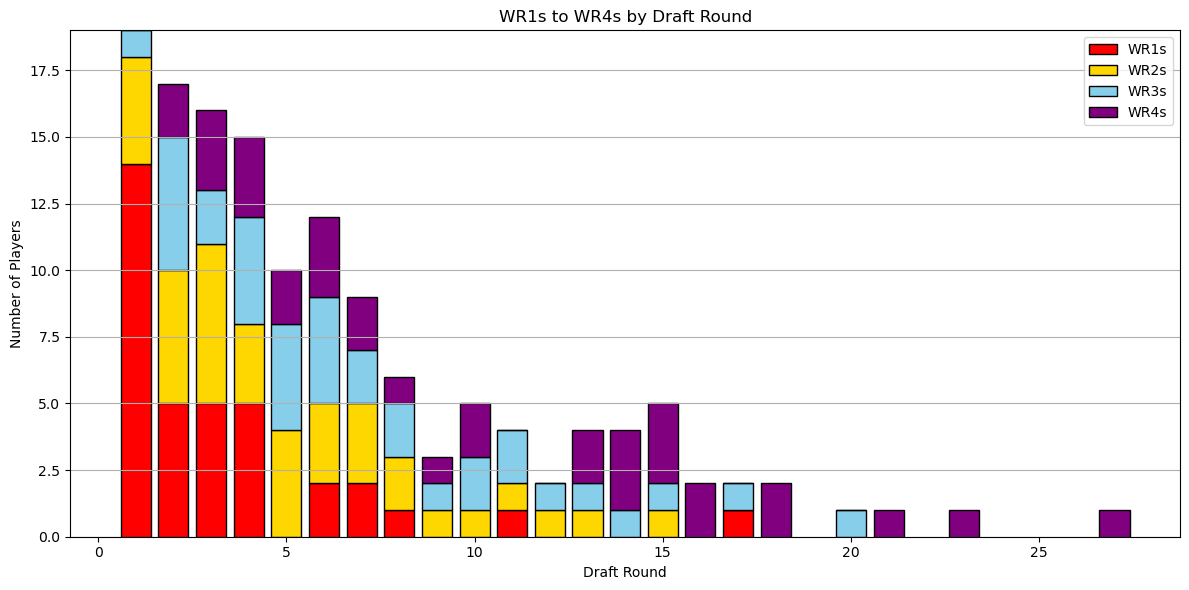

In [173]:
import matplotlib.pyplot as plt

# Count WRs by round
wr1_counts = wr1s["DraftRound"].value_counts().sort_index()
wr2_counts = wr2s["DraftRound"].value_counts().sort_index()
wr3_counts = wr3s["DraftRound"].value_counts().sort_index()
wr4_counts = wr4s["DraftRound"].value_counts().sort_index()

# Align round index
all_rounds = sorted(set(wr1_counts.index).union(wr2_counts.index).union(wr3_counts.index).union(wr4_counts.index))
wr1_counts = wr1_counts.reindex(all_rounds, fill_value=0)
wr2_counts = wr2_counts.reindex(all_rounds, fill_value=0)
wr3_counts = wr3_counts.reindex(all_rounds, fill_value=0)
wr4_counts = wr4_counts.reindex(all_rounds, fill_value=0)

# Stacked bar plot
plt.figure(figsize=(12, 6))
plt.bar(all_rounds, wr1_counts, label="WR1s", color="red", edgecolor="black")
plt.bar(all_rounds, wr2_counts, bottom=wr1_counts, label="WR2s", color="gold", edgecolor="black")
plt.bar(all_rounds, wr3_counts, bottom=wr1_counts + wr2_counts, label="WR3s", color="skyblue", edgecolor="black")
plt.bar(all_rounds, wr4_counts, bottom=wr1_counts + wr2_counts + wr3_counts, label="WR4s", color="purple", edgecolor="black")

plt.title("WR1s to WR4s by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Number of Players")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [50]:
# Step 1: Filter to TEs only
tes_only = df_final_cleaned[df_final_cleaned["EOS_POS"] == "TE"]

# Step 2: Filter to players who played 10+ games (if you still want that)
tes_only = tes_only[tes_only["GamesPlayed"] >= 10]

# Step 3: Keep only QB1s — top 12 per year by FinalRankPosition
te1s = tes_only[tes_only["FinalRankPosition"] <= 12]

In [51]:
print("Average Vegas Win Total for TE1s:", te1s["VegasWinTotal"].mean())

Average Vegas Win Total for TE1s: 8.785714285714286


In [175]:
# Ensure DraftRound column is created
df_final_cleaned["DraftRound"] = ((df_final_cleaned["ADP"] - 1) // 12 + 1).astype(int)

# TE filters (10+ games)
te1s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "TE") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(1, 12))]

te2s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "TE") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(13, 24))]

te3s = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "TE") &
                        (df_final_cleaned["GamesPlayed"] >= 10) &
                        (df_final_cleaned["FinalRankPosition"].between(25, 36))]


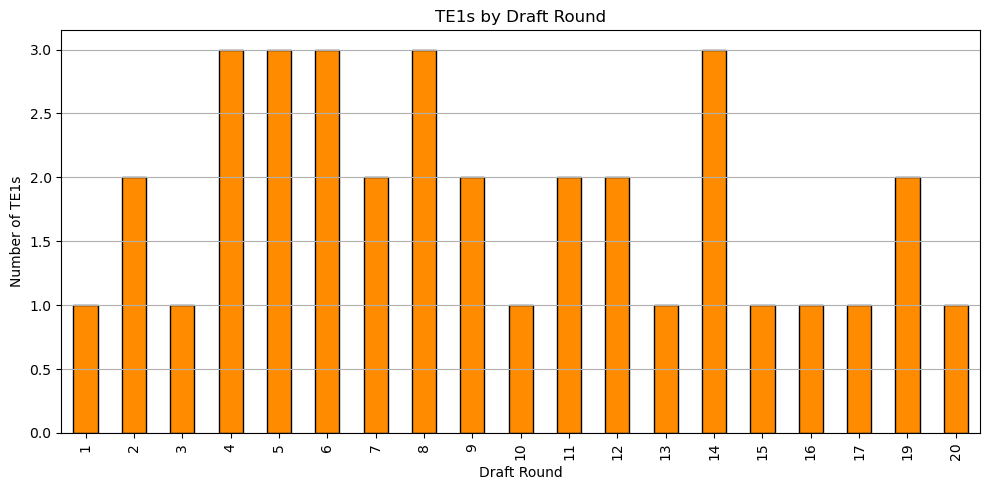

In [179]:
# Make sure DraftRound exists
df_final_cleaned["DraftRound"] = ((df_final_cleaned["ADP"] - 1) // 12 + 1).astype(int)

# Filter for TE1s
te1s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "TE") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
]

# Count TE1s by draft round
te1_counts = te1s["DraftRound"].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
te1_counts.plot(kind="bar", color="darkorange", edgecolor="black")
plt.title("TE1s by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Number of TE1s")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [53]:
print("Avg Vegas Wins — QB1s:", qb1s["VegasWinTotal"].mean())
print("Avg Vegas Wins — RB1s:", rb1s["VegasWinTotal"].mean())
print("Avg Vegas Wins — RB2s:", rb2s["VegasWinTotal"].mean())
print("Avg Vegas Wins — RB3s:", rb3s["VegasWinTotal"].mean())
print("Avg Vegas Wins — WR1s:", wr1s["VegasWinTotal"].mean())
print("Avg Vegas Wins — WR2s:", wr2s["VegasWinTotal"].mean())
print("Avg Vegas Wins — WR3s:", wr3s["VegasWinTotal"].mean())
print("Avg Vegas Wins — WR4s:", wr4s["VegasWinTotal"].mean())
print("Avg Vegas Wins — TE1s:", te1s["VegasWinTotal"].mean())

Avg Vegas Wins — QB1s: 9.027777777777779
Avg Vegas Wins — RB1s: 9.027777777777779
Avg Vegas Wins — RB2s: 8.708333333333334
Avg Vegas Wins — RB3s: 7.617647058823529
Avg Vegas Wins — WR1s: 9.069444444444445
Avg Vegas Wins — WR2s: 8.458333333333334
Avg Vegas Wins — WR3s: 8.728571428571428
Avg Vegas Wins — WR4s: 8.808823529411764
Avg Vegas Wins — TE1s: 8.785714285714286


In [54]:
# Step 1: Filter to QBs with 10+ games
qbs_only = df_final_cleaned[(df_final_cleaned["EOS_POS"] == "QB") & (df_final_cleaned["GamesPlayed"] >= 10)].copy()

# Step 2: Define whether player finished as a QB1 (Top 12)
qbs_only["Is_QB1"] = qbs_only["FinalRankPosition"] <= 12

# Step 3: Use 9.0 as the threshold for a "strong" team (based on your earlier data)
qbs_only["StrongTeamVegas"] = qbs_only["VegasWinTotal"] >= 9.0

# Step 4: Calculate probabilities
rate_strong = qbs_only[qbs_only["StrongTeamVegas"]]["Is_QB1"].mean()
rate_weak = qbs_only[~qbs_only["StrongTeamVegas"]]["Is_QB1"].mean()

# Step 5: Print results
print(f"QB1 Rate (Vegas ≥ 9 wins): {rate_strong:.2%}")
print(f"QB1 Rate (Vegas < 9 wins): {rate_weak:.2%}")
print(f"Players on strong Vegas teams are {rate_strong / rate_weak:.2f}x more likely to finish as a QB1.")


QB1 Rate (Vegas ≥ 9 wins): 53.66%
QB1 Rate (Vegas < 9 wins): 28.57%
Players on strong Vegas teams are 1.88x more likely to finish as a QB1.


In [55]:
# Step 1: Filter to only QB1s (top 12 finishers who played 10+ games)
qb1s_only = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "QB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
]

# Step 2: Calculate counts
total_qb1s = len(qb1s_only)
strong_qb1s = (qb1s_only["VegasWinTotal"] >= 9).sum()
weak_qb1s = total_qb1s - strong_qb1s

# Step 3: Percentages
strong_pct = strong_qb1s / total_qb1s
weak_pct = weak_qb1s / total_qb1s

# Step 4: Likelihood multiplier
multiplier = (strong_pct / weak_pct) if weak_pct > 0 else float("inf")

# Step 5: Print results
print(f"Of all QB1s:")
print(f"{strong_pct:.2%} came from teams with Vegas win totals ≥ 9")
print(f"{weak_pct:.2%} came from teams with Vegas win totals < 9")
print(f"A QB1 is {multiplier:.2f}x more likely to come from a team with Vegas win totals ≥ 9 than from a team below 9.")


Of all QB1s:
61.11% came from teams with Vegas win totals ≥ 9
38.89% came from teams with Vegas win totals < 9
A QB1 is 1.57x more likely to come from a team with Vegas win totals ≥ 9 than from a team below 9.


In [56]:
# Step 1: Filter to only RB1s (top 12 finishers who played 10+ games)
rb1s_only = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "RB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
]

# Step 2: Count totals from strong and weak teams (Vegas win total ≥ 9)
total_rb1s = len(rb1s_only)
strong_rb1s = (rb1s_only["VegasWinTotal"] >= 9).sum()
weak_rb1s = total_rb1s - strong_rb1s

# Step 3: Calculate percentages
strong_pct = strong_rb1s / total_rb1s
weak_pct = weak_rb1s / total_rb1s

# Step 4: Calculate likelihood multiplier
multiplier = (strong_pct / weak_pct) if weak_pct > 0 else float("inf")

# Step 5: Print results
print(f"Of all RB1s:")
print(f"{strong_pct:.2%} came from teams with Vegas win totals ≥ 9")
print(f"{weak_pct:.2%} came from teams with Vegas win totals < 9")
print(f"An RB1 is {multiplier:.2f}x more likely to come from a team with Vegas win totals ≥ 9 than from a team below 9.")


Of all RB1s:
61.11% came from teams with Vegas win totals ≥ 9
38.89% came from teams with Vegas win totals < 9
An RB1 is 1.57x more likely to come from a team with Vegas win totals ≥ 9 than from a team below 9.


In [57]:
# RB2s (ranks 13–24, 10+ games)
rb2s_only = rb2s.copy()

# Total, strong, weak counts
total_rb2s = len(rb2s_only)
strong_rb2s = (rb2s_only["VegasWinTotal"] >= 8.5).sum()  # adjust threshold as needed
weak_rb2s = total_rb2s - strong_rb2s

# Percentages
strong_pct_rb2 = strong_rb2s / total_rb2s
weak_pct_rb2 = weak_rb2s / total_rb2s

# Multiplier
multiplier_rb2 = strong_pct_rb2 / weak_pct_rb2 if weak_pct_rb2 > 0 else float("inf")

# Output
print(f"Of all RB2s:")
print(f"{strong_pct_rb2:.2%} came from teams with Vegas win totals ≥ 8.5")
print(f"{weak_pct_rb2:.2%} came from teams with Vegas win totals < 8.5")
print(f"An RB2 is {multiplier_rb2:.2f}x more likely to come from a team with Vegas win totals ≥ 8.5 than from a team below 8.5.")


Of all RB2s:
63.89% came from teams with Vegas win totals ≥ 8.5
36.11% came from teams with Vegas win totals < 8.5
An RB2 is 1.77x more likely to come from a team with Vegas win totals ≥ 8.5 than from a team below 8.5.


In [58]:
# RB3s (ranks 25–36, 10+ games)
rb3s_only = rb3s.copy()

# Total, strong, weak counts
total_rb3s = len(rb3s_only)
strong_rb3s = (rb3s_only["VegasWinTotal"] >= 7.5).sum()  # adjust threshold as needed
weak_rb3s = total_rb3s - strong_rb3s

# Percentages
strong_pct_rb3 = strong_rb3s / total_rb3s
weak_pct_rb3 = weak_rb3s / total_rb3s

# Multiplier
multiplier_rb3 = strong_pct_rb3 / weak_pct_rb3 if weak_pct_rb3 > 0 else float("inf")

# Output
print(f"Of all RB3s:")
print(f"{strong_pct_rb3:.2%} came from teams with Vegas win totals ≥ 7.5")
print(f"{weak_pct_rb3:.2%} came from teams with Vegas win totals < 7.5")
print(f"An RB3 is {multiplier_rb3:.2f}x more likely to come from a team with Vegas win totals ≥ 7.5 than from a team below 7.5.")


Of all RB3s:
61.76% came from teams with Vegas win totals ≥ 7.5
38.24% came from teams with Vegas win totals < 7.5
An RB3 is 1.62x more likely to come from a team with Vegas win totals ≥ 7.5 than from a team below 7.5.


In [59]:
wr1s_only = wr1s.copy()

total_wr1s = len(wr1s_only)
strong_wr1s = (wr1s_only["VegasWinTotal"] >= 9).sum()
weak_wr1s = total_wr1s - strong_wr1s

strong_pct_wr1 = strong_wr1s / total_wr1s
weak_pct_wr1 = weak_wr1s / total_wr1s

multiplier_wr1 = strong_pct_wr1 / weak_pct_wr1 if weak_pct_wr1 > 0 else float("inf")

print("Of all WR1s:")
print(f"{strong_pct_wr1:.2%} came from teams with Vegas win totals ≥ 9")
print(f"{weak_pct_wr1:.2%} came from teams with Vegas win totals < 9")
print(f"A WR1 is {multiplier_wr1:.2f}x more likely to come from a team with Vegas win totals ≥ 9.")


Of all WR1s:
58.33% came from teams with Vegas win totals ≥ 9
41.67% came from teams with Vegas win totals < 9
A WR1 is 1.40x more likely to come from a team with Vegas win totals ≥ 9.


In [60]:
wr2s_only = wr2s.copy()

total_wr2s = len(wr2s_only)
strong_wr2s = (wr2s_only["VegasWinTotal"] >= 8.5).sum()
weak_wr2s = total_wr2s - strong_wr2s

strong_pct_wr2 = strong_wr2s / total_wr2s
weak_pct_wr2 = weak_wr2s / total_wr2s

multiplier_wr2 = strong_pct_wr2 / weak_pct_wr2 if weak_pct_wr2 > 0 else float("inf")

print("Of all WR2s:")
print(f"{strong_pct_wr2:.2%} came from teams with Vegas win totals ≥ 8.5")
print(f"{weak_pct_wr2:.2%} came from teams with Vegas win totals < 8.5")
print(f"A WR2 is {multiplier_wr2:.2f}x more likely to come from a team with Vegas win totals ≥ 8.5.")


Of all WR2s:
61.11% came from teams with Vegas win totals ≥ 8.5
38.89% came from teams with Vegas win totals < 8.5
A WR2 is 1.57x more likely to come from a team with Vegas win totals ≥ 8.5.


In [61]:
wr3s_only = wr3s.copy()

total_wr3s = len(wr3s_only)
strong_wr3s = (wr3s_only["VegasWinTotal"] >= 8.5).sum()
weak_wr3s = total_wr3s - strong_wr3s

strong_pct_wr3 = strong_wr3s / total_wr3s
weak_pct_wr3 = weak_wr3s / total_wr3s

multiplier_wr3 = strong_pct_wr3 / weak_pct_wr3 if weak_pct_wr3 > 0 else float("inf")

print("Of all WR3s:")
print(f"{strong_pct_wr3:.2%} came from teams with Vegas win totals ≥ 8.5")
print(f"{weak_pct_wr3:.2%} came from teams with Vegas win totals < 8.5")
print(f"A WR3 is {multiplier_wr3:.2f}x more likely to come from a team with Vegas win totals ≥ 8.5.")


Of all WR3s:
62.86% came from teams with Vegas win totals ≥ 8.5
37.14% came from teams with Vegas win totals < 8.5
A WR3 is 1.69x more likely to come from a team with Vegas win totals ≥ 8.5.


In [62]:
wr4s_only = wr4s.copy()

total_wr4s = len(wr4s_only)
strong_wr4s = (wr4s_only["VegasWinTotal"] >= 8.5).sum()
weak_wr4s = total_wr4s - strong_wr4s

strong_pct_wr4 = strong_wr4s / total_wr4s
weak_pct_wr4 = weak_wr4s / total_wr4s

multiplier_wr4 = strong_pct_wr4 / weak_pct_wr4 if weak_pct_wr4 > 0 else float("inf")

print("Of all WR4s:")
print(f"{strong_pct_wr4:.2%} came from teams with Vegas win totals ≥ 8.5")
print(f"{weak_pct_wr4:.2%} came from teams with Vegas win totals < 8.5")
print(f"A WR4 is {multiplier_wr4:.2f}x more likely to come from a team with Vegas win totals ≥ 8.5.")


Of all WR4s:
73.53% came from teams with Vegas win totals ≥ 8.5
26.47% came from teams with Vegas win totals < 8.5
A WR4 is 2.78x more likely to come from a team with Vegas win totals ≥ 8.5.


In [63]:
# Filter to TE1s (top 12 finishers, 10+ games)
te1s_only = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "TE") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
]

# Count totals
total_te1s = len(te1s_only)
strong_te1s = (te1s_only["VegasWinTotal"] >= 8.5).sum()
weak_te1s = total_te1s - strong_te1s

# Percentages
strong_pct_te1 = strong_te1s / total_te1s
weak_pct_te1 = weak_te1s / total_te1s

# Multiplier
multiplier_te1 = strong_pct_te1 / weak_pct_te1 if weak_pct_te1 > 0 else float("inf")

# Output
print("Of all TE1s:")
print(f"{strong_pct_te1:.2%} came from teams with Vegas win totals ≥ 8.5")
print(f"{weak_pct_te1:.2%} came from teams with Vegas win totals < 8.5")
print(f"A TE1 is {multiplier_te1:.2f}x more likely to come from a team with Vegas win totals ≥ 8.5.")


Of all TE1s:
65.71% came from teams with Vegas win totals ≥ 8.5
34.29% came from teams with Vegas win totals < 8.5
A TE1 is 1.92x more likely to come from a team with Vegas win totals ≥ 8.5.


In [64]:
def print_likelihood_range(df, pos, lower, upper, threshold, label):
    # Filter to only players of the given position, games played, and final rank range
    data = df[
        (df["EOS_POS"] == pos) &
        (df["GamesPlayed"] >= 10) &
        (df["FinalRankPosition"].between(lower, upper))
    ].copy()
    
    total = len(data)
    strong = (data["VegasWinTotal"] >= threshold).sum()
    weak = total - strong

    strong_pct = strong / total if total > 0 else 0
    weak_pct = weak / total if total > 0 else 0
    multiplier = strong_pct / weak_pct if weak_pct > 0 else float("inf")

    print(f"{pos}s — {label} ({lower}-{upper})")
    print(f"Of all {label}s:")
    print(f"{strong_pct:.2%} came from teams with Vegas win totals ≥ {threshold}")
    print(f"{weak_pct:.2%} came from teams with Vegas win totals < {threshold}")
    print(f"{label}s are {multiplier:.2f}x more likely to come from strong Vegas teams.\n")


In [65]:
print_likelihood_range(df_final_cleaned, "QB", 1, 12, 9, "QB1")
print_likelihood_range(df_final_cleaned, "RB", 1, 12, 9, "RB1")
print_likelihood_range(df_final_cleaned, "RB", 13, 24, 8.5, "RB2")
print_likelihood_range(df_final_cleaned, "RB", 25, 36, 7.5, "RB3")
print_likelihood_range(df_final_cleaned, "WR", 1, 12, 9, "WR1")
print_likelihood_range(df_final_cleaned, "WR", 13, 24, 8.5, "WR2")
print_likelihood_range(df_final_cleaned, "WR", 25, 36, 8.5, "WR3")
print_likelihood_range(df_final_cleaned, "WR", 37, 48, 8.5, "WR4")
print_likelihood_range(df_final_cleaned, "TE", 1, 12, 8.5, "TE1")


QBs — QB1 (1-12)
Of all QB1s:
61.11% came from teams with Vegas win totals ≥ 9
38.89% came from teams with Vegas win totals < 9
QB1s are 1.57x more likely to come from strong Vegas teams.

RBs — RB1 (1-12)
Of all RB1s:
61.11% came from teams with Vegas win totals ≥ 9
38.89% came from teams with Vegas win totals < 9
RB1s are 1.57x more likely to come from strong Vegas teams.

RBs — RB2 (13-24)
Of all RB2s:
63.89% came from teams with Vegas win totals ≥ 8.5
36.11% came from teams with Vegas win totals < 8.5
RB2s are 1.77x more likely to come from strong Vegas teams.

RBs — RB3 (25-36)
Of all RB3s:
61.76% came from teams with Vegas win totals ≥ 7.5
38.24% came from teams with Vegas win totals < 7.5
RB3s are 1.62x more likely to come from strong Vegas teams.

WRs — WR1 (1-12)
Of all WR1s:
58.33% came from teams with Vegas win totals ≥ 9
41.67% came from teams with Vegas win totals < 9
WR1s are 1.40x more likely to come from strong Vegas teams.

WRs — WR2 (13-24)
Of all WR2s:
61.11% came fr

In [66]:
# Calculate draft round from ADP (1–18)
df_final_cleaned["DraftRound"] = df_final_cleaned["ADP"].apply(lambda x: int((x - 1) // 12 + 1) if pd.notnull(x) else None)


In [67]:
# Filter to players who played at least 10 games
df_filtered = df_final_cleaned[df_final_cleaned["GamesPlayed"] >= 10].copy()

# Add positional finish flags using .between()
df_filtered["Is_QB1"] = (df_filtered["EOS_POS"] == "QB") & (df_filtered["FinalRankPosition"].between(1, 12))
df_filtered["Is_RB1_2"] = (df_filtered["EOS_POS"] == "RB") & (df_filtered["FinalRankPosition"].between(1, 24))
df_filtered["Is_RB3"] = (df_filtered["EOS_POS"] == "RB") & (df_filtered["FinalRankPosition"].between(25, 36))
df_filtered["Is_WR1_2"] = (df_filtered["EOS_POS"] == "WR") & (df_filtered["FinalRankPosition"].between(1, 24))
df_filtered["Is_WR3"] = (df_filtered["EOS_POS"] == "WR") & (df_filtered["FinalRankPosition"].between(25, 36))
df_filtered["Is_WR4"] = (df_filtered["EOS_POS"] == "WR") & (df_filtered["FinalRankPosition"].between(37, 48))
df_filtered["Is_TE1"] = (df_filtered["EOS_POS"] == "TE") & (df_filtered["FinalRankPosition"].between(1, 12))


QB Round by Round

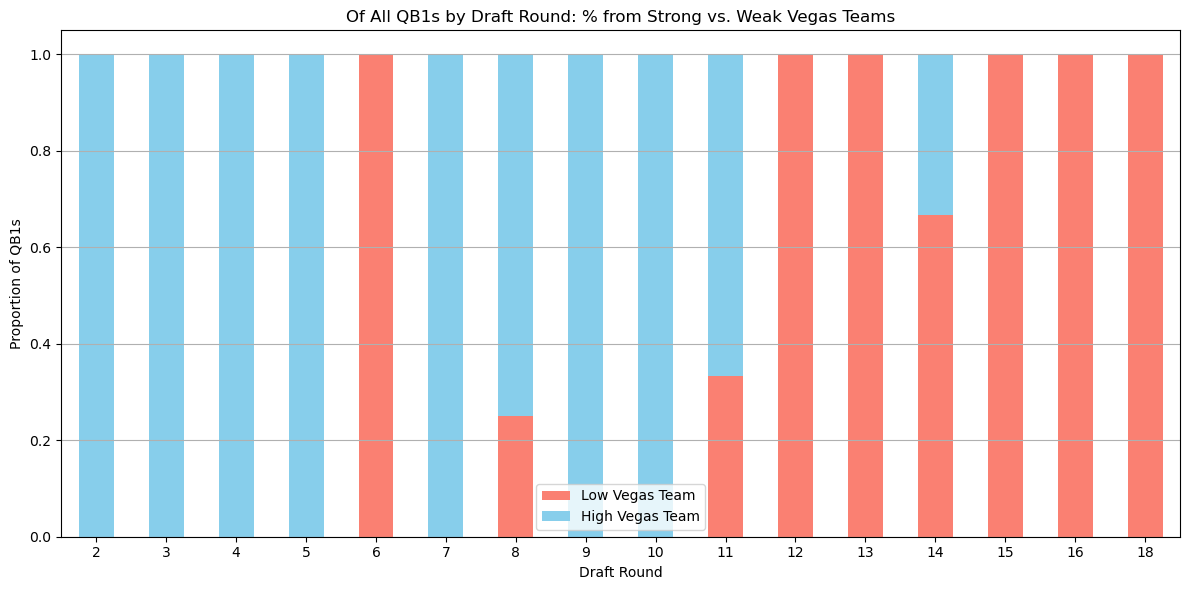

In [69]:
# Filter to QB1s only
qbs = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "QB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
].copy()

# Assign draft round and team strength
qbs["DraftRound"] = ((qbs["ADP"] - 1) // 12 + 1).astype(int)
qbs["StrongTeam"] = qbs["VegasWinTotal"] >= 9
qbs = qbs[qbs["DraftRound"] <= 18]

# Count % of QB1s in each draft round from strong vs weak teams
qb1_flipped = (
    qbs.groupby(["DraftRound", "StrongTeam"])
    .size()
    .unstack()
    .fillna(0)
)

# Normalize to get proportions
qb1_flipped = (qb1_flipped.T / qb1_flipped.sum(axis=1)).T
qb1_flipped.columns = ["Low Vegas Team", "High Vegas Team"]

# Plot
qb1_flipped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All QB1s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of QB1s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


RB Round by Round

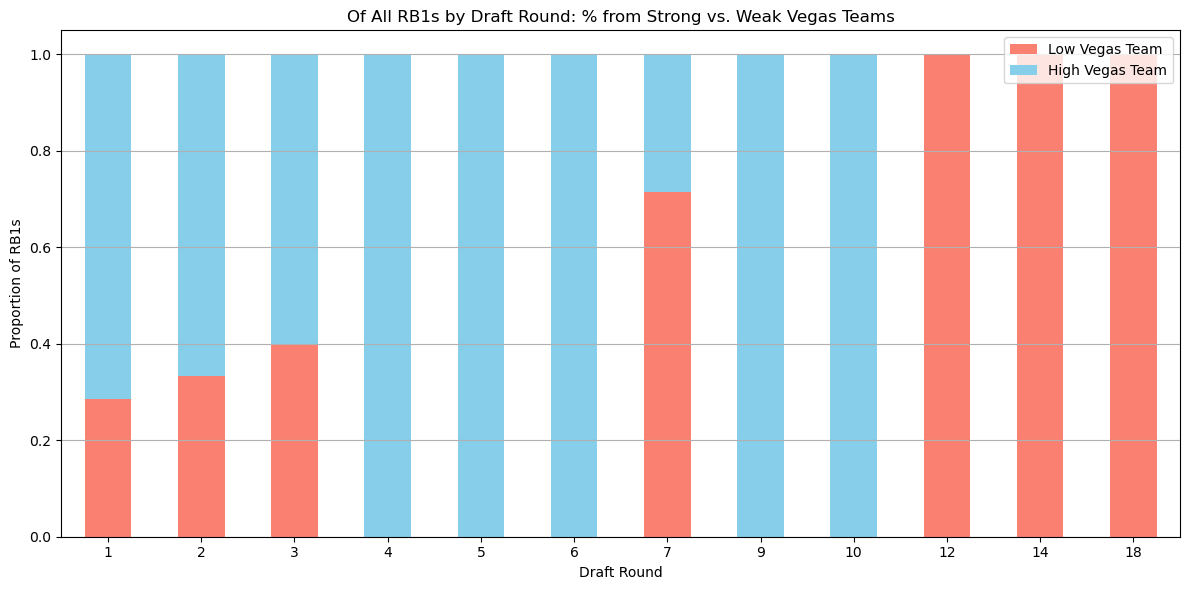

In [71]:
# Filter to RB1s only (1–12)
rb1s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "RB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
].copy()

# Assign draft round and team strength
rb1s["DraftRound"] = ((rb1s["ADP"] - 1) // 12 + 1).astype(int)
rb1s["StrongTeam"] = rb1s["VegasWinTotal"] >= 9
rb1s = rb1s[rb1s["DraftRound"] <= 18]

# Group and normalize
rb1_grouped = rb1s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
rb1_grouped = (rb1_grouped.T / rb1_grouped.sum(axis=1)).T
rb1_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

# Plot
rb1_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All RB1s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of RB1s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


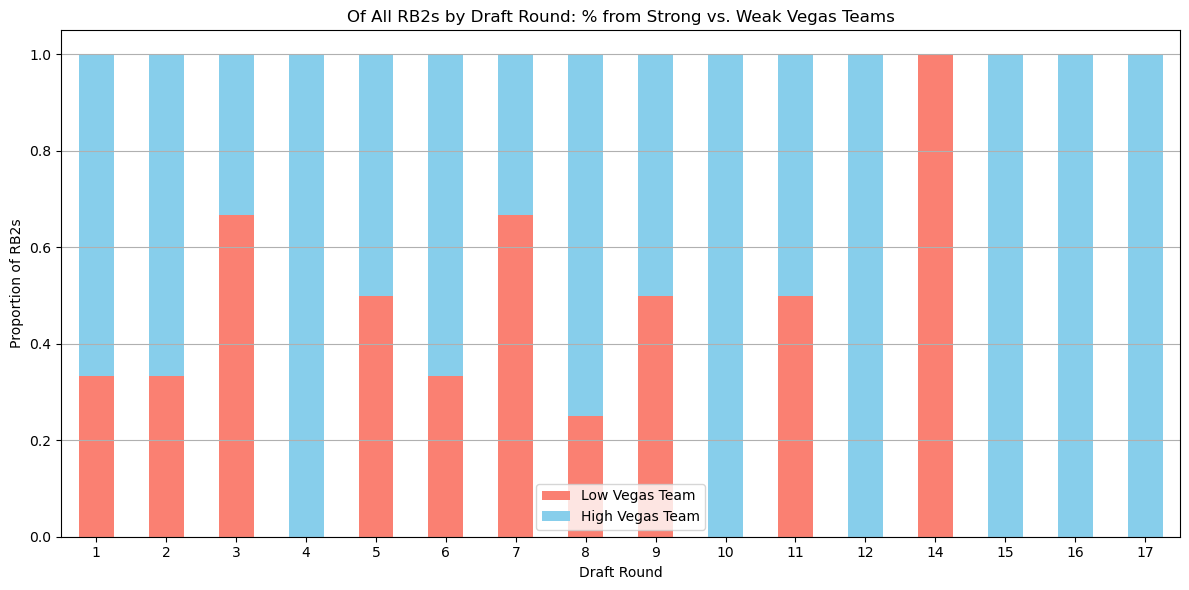

In [72]:
rb2s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "RB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(13, 24))
].copy()

rb2s["DraftRound"] = ((rb2s["ADP"] - 1) // 12 + 1).astype(int)
rb2s["StrongTeam"] = rb2s["VegasWinTotal"] >= 8.5
rb2s = rb2s[rb2s["DraftRound"] <= 18]

rb2_grouped = rb2s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
rb2_grouped = (rb2_grouped.T / rb2_grouped.sum(axis=1)).T
rb2_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

rb2_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All RB2s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of RB2s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


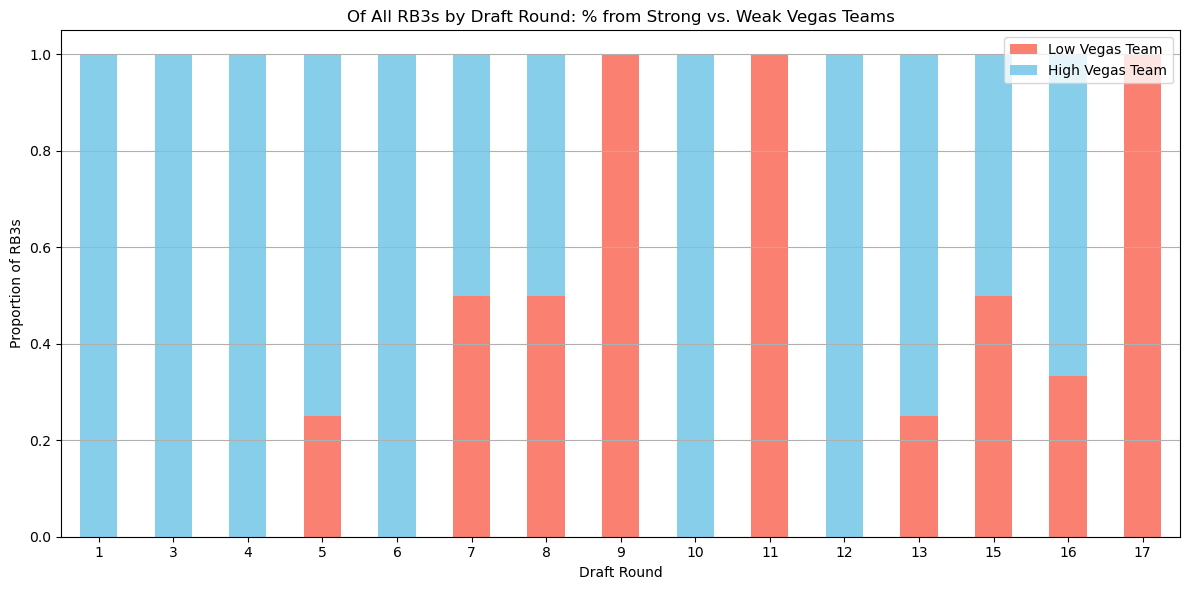

In [73]:
rb3s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "RB") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(25, 36))
].copy()

rb3s["DraftRound"] = ((rb3s["ADP"] - 1) // 12 + 1).astype(int)
rb3s["StrongTeam"] = rb3s["VegasWinTotal"] >= 7.5
rb3s = rb3s[rb3s["DraftRound"] <= 18]

rb3_grouped = rb3s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
rb3_grouped = (rb3_grouped.T / rb3_grouped.sum(axis=1)).T
rb3_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

rb3_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All RB3s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of RB3s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


WR Round by Round

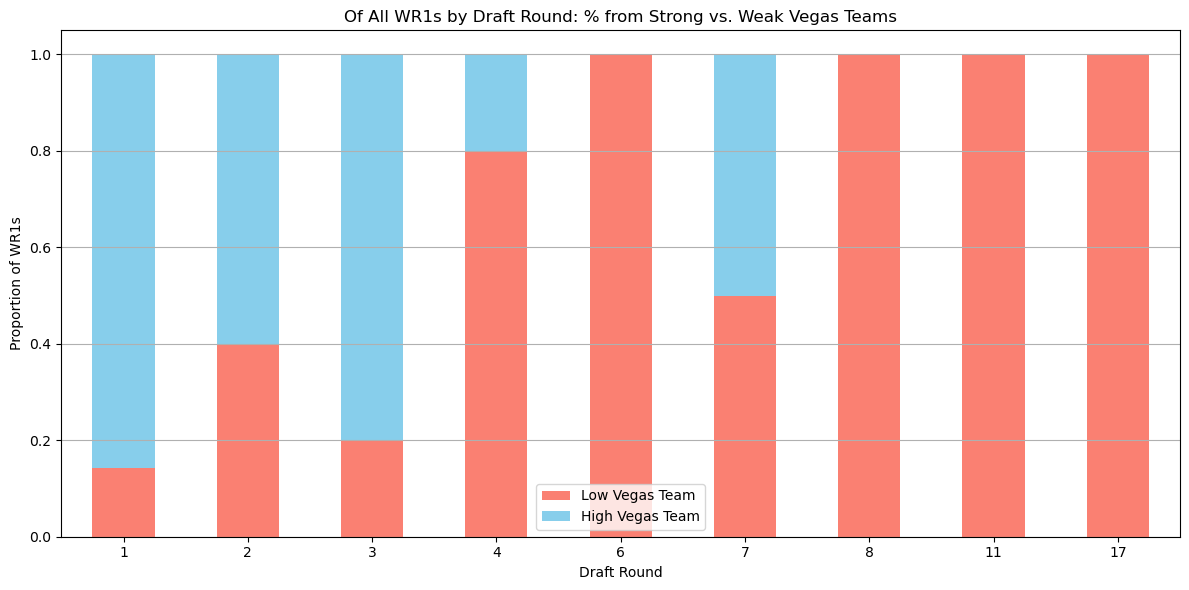

In [75]:
wr1s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "WR") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
].copy()

wr1s["DraftRound"] = ((wr1s["ADP"] - 1) // 12 + 1).astype(int)
wr1s["StrongTeam"] = wr1s["VegasWinTotal"] >= 9
wr1s = wr1s[wr1s["DraftRound"] <= 18]

wr1_grouped = wr1s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
wr1_grouped = (wr1_grouped.T / wr1_grouped.sum(axis=1)).T
wr1_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

wr1_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All WR1s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of WR1s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


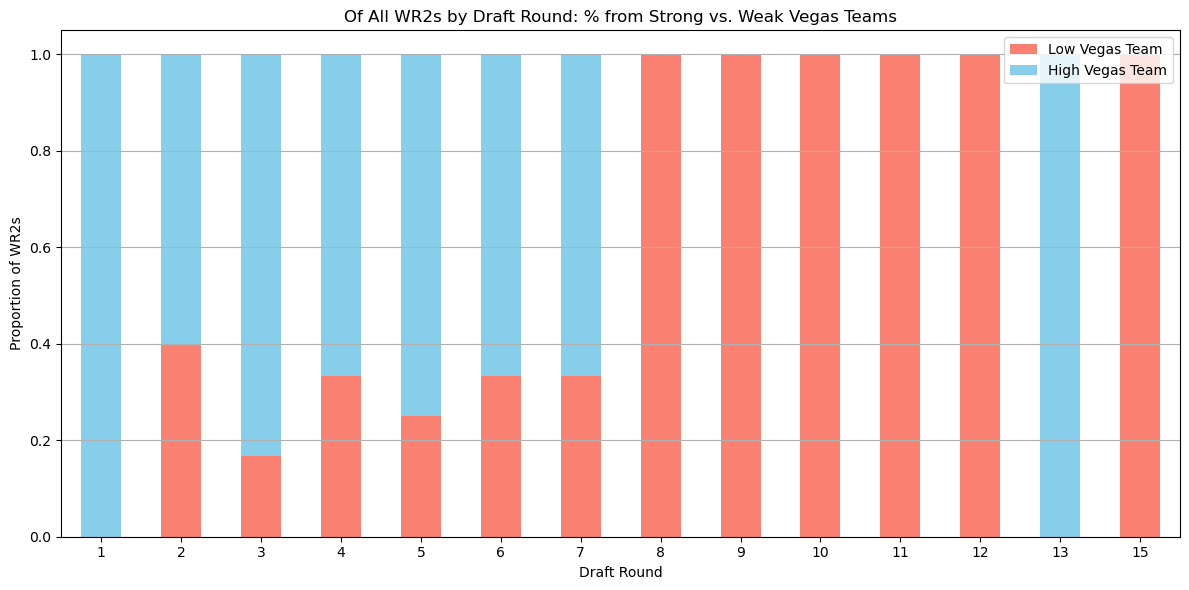

In [76]:
wr2s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "WR") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(13, 24))
].copy()

wr2s["DraftRound"] = ((wr2s["ADP"] - 1) // 12 + 1).astype(int)
wr2s["StrongTeam"] = wr2s["VegasWinTotal"] >= 8.5
wr2s = wr2s[wr2s["DraftRound"] <= 18]

wr2_grouped = wr2s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
wr2_grouped = (wr2_grouped.T / wr2_grouped.sum(axis=1)).T
wr2_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

wr2_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All WR2s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of WR2s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


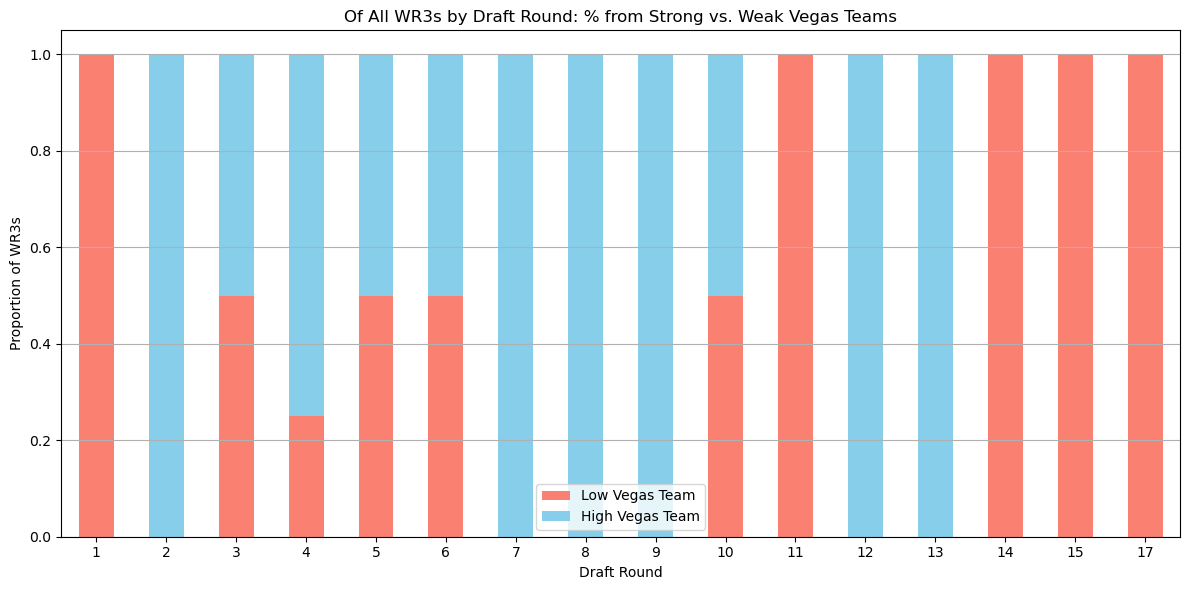

In [77]:
wr3s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "WR") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(25, 36))
].copy()

wr3s["DraftRound"] = ((wr3s["ADP"] - 1) // 12 + 1).astype(int)
wr3s["StrongTeam"] = wr3s["VegasWinTotal"] >= 8.5
wr3s = wr3s[wr3s["DraftRound"] <= 18]

wr3_grouped = wr3s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
wr3_grouped = (wr3_grouped.T / wr3_grouped.sum(axis=1)).T
wr3_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

wr3_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All WR3s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of WR3s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


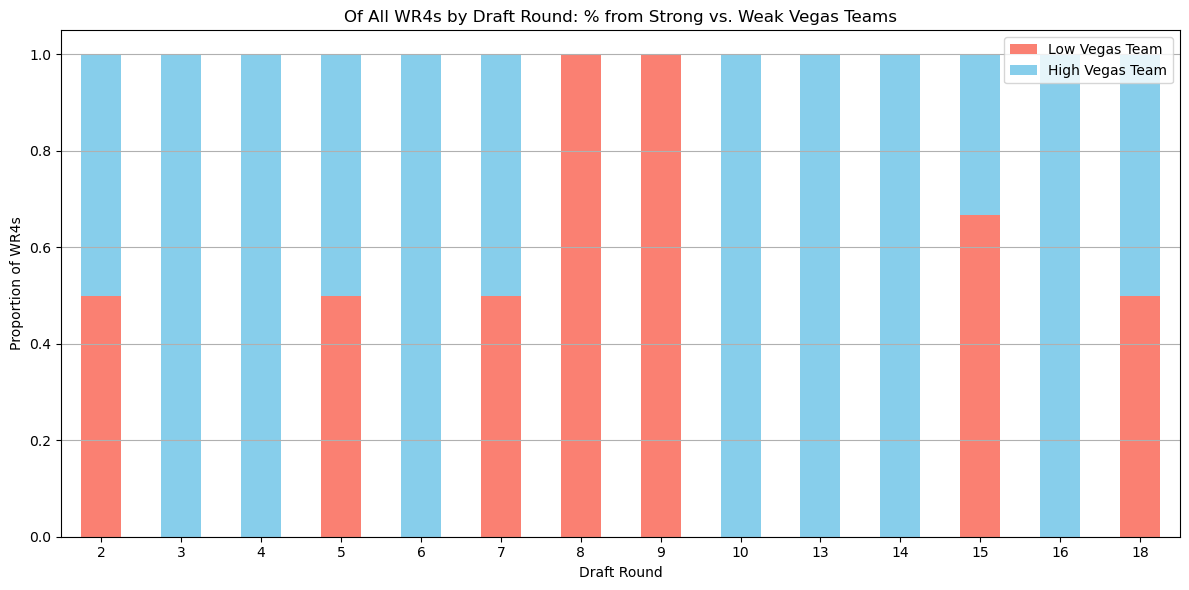

In [78]:
wr4s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "WR") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(37, 48))
].copy()

wr4s["DraftRound"] = ((wr4s["ADP"] - 1) // 12 + 1).astype(int)
wr4s["StrongTeam"] = wr4s["VegasWinTotal"] >= 8.5
wr4s = wr4s[wr4s["DraftRound"] <= 18]

wr4_grouped = wr4s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
wr4_grouped = (wr4_grouped.T / wr4_grouped.sum(axis=1)).T
wr4_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

wr4_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All WR4s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of WR4s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


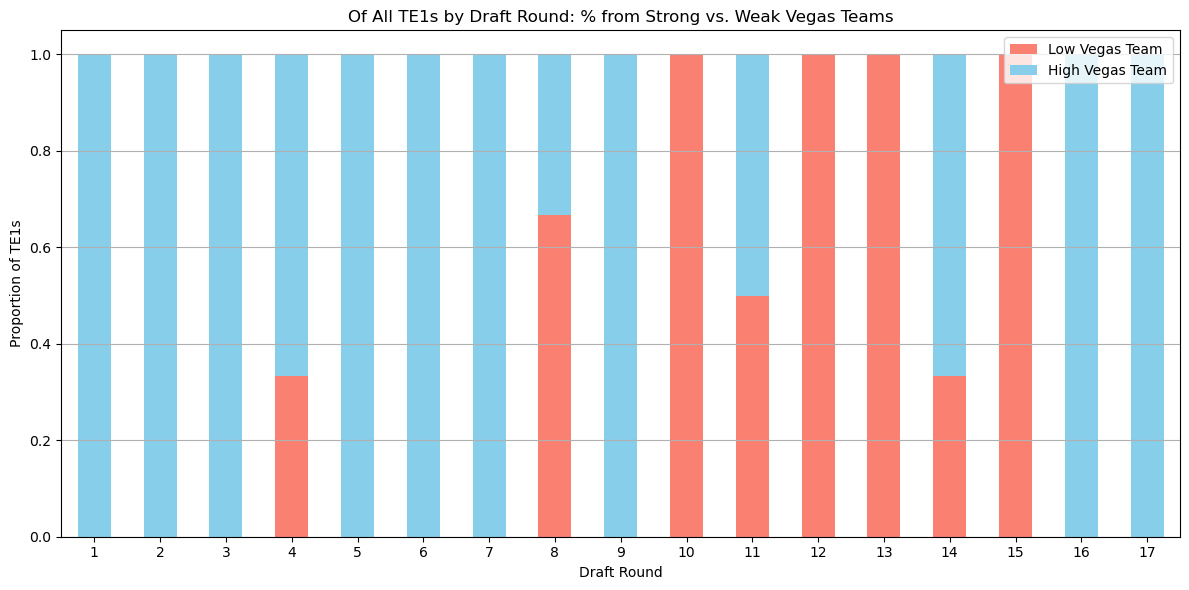

In [79]:
te1s = df_final_cleaned[
    (df_final_cleaned["EOS_POS"] == "TE") &
    (df_final_cleaned["GamesPlayed"] >= 10) &
    (df_final_cleaned["FinalRankPosition"].between(1, 12))
].copy()

te1s["DraftRound"] = ((te1s["ADP"] - 1) // 12 + 1).astype(int)
te1s["StrongTeam"] = te1s["VegasWinTotal"] >= 8.5
te1s = te1s[te1s["DraftRound"] <= 18]

te1_grouped = te1s.groupby(["DraftRound", "StrongTeam"]).size().unstack().fillna(0)
te1_grouped = (te1_grouped.T / te1_grouped.sum(axis=1)).T
te1_grouped.columns = ["Low Vegas Team", "High Vegas Team"]

te1_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["salmon", "skyblue"])
plt.title("Of All TE1s by Draft Round: % from Strong vs. Weak Vegas Teams")
plt.xlabel("Draft Round")
plt.ylabel("Proportion of TE1s")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
